In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import ascii

In [3]:
cat_files = ['cat1_50.pk','cat51_100.pk','cat101_150.pk','cat151_200.pk','cat201_235.pk',
             'cat236_257.pk','cat258_279.pk','cat280_320.pk','cat321_360.pk','cat361_406.pk']

CAT = pickle.load(open(f'pickle/cat101_150.pk','rb'))

bounds = pickle.load(open('./pickle/bounds.pk','rb'))

training_data = pickle.load(open('./pickle/training_data/training_data_0203_jhk.pk','rb'))

master_cat = pd.read_csv('./catdata/master_catalog_jan_2023.csv') #2184 objects long

# PAndAS Plots

In [90]:
cat = CAT[141].to_pandas()
cat = cat[cat['ig'].isin([-2,-1,1,2])]
cat = cat.reset_index(drop=True)
cat = cat.loc[::3]

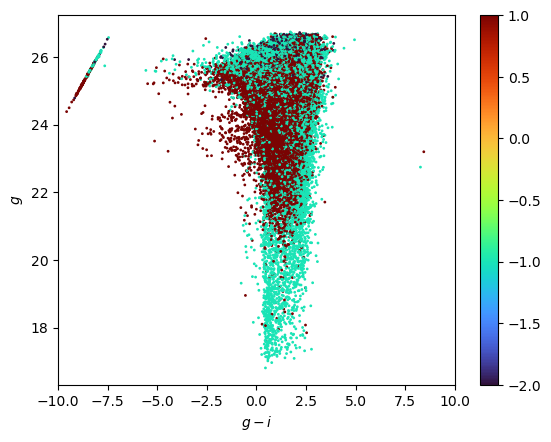

In [97]:
plt.scatter(cat['g']-cat['i'],cat['g'],c=cat['ig'],cmap='', s=1)
plt.xlabel('$g-i$')
plt.ylabel('$g$')
plt.xlim([-10,10])
plt.colorbar()
plt.show()

# Training Data Plots

In [65]:
training_data = pickle.load(open('./pickle/training_data/training_data_0203_jhk.pk','rb'))
gcs = training_data[training_data['class'] == 'gc']

galaxies = training_data[training_data['class']=='galaxy']

In [66]:
test = 9
for t in enumerate(plt.style.available[test:],start=test):
    print(t)
style = plt.style.available[test]
plt.style.use(style)

font = {'family' : 'Georgia',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

(9, 'ggplot')
(10, 'grayscale')
(11, 'seaborn')
(12, 'seaborn-bright')
(13, 'seaborn-colorblind')
(14, 'seaborn-dark')
(15, 'seaborn-dark-palette')
(16, 'seaborn-darkgrid')
(17, 'seaborn-deep')
(18, 'seaborn-muted')
(19, 'seaborn-notebook')
(20, 'seaborn-paper')
(21, 'seaborn-pastel')
(22, 'seaborn-poster')
(23, 'seaborn-talk')
(24, 'seaborn-ticks')
(25, 'seaborn-white')
(26, 'seaborn-whitegrid')
(27, 'tableau-colorblind10')


(-2.1, 6.1)

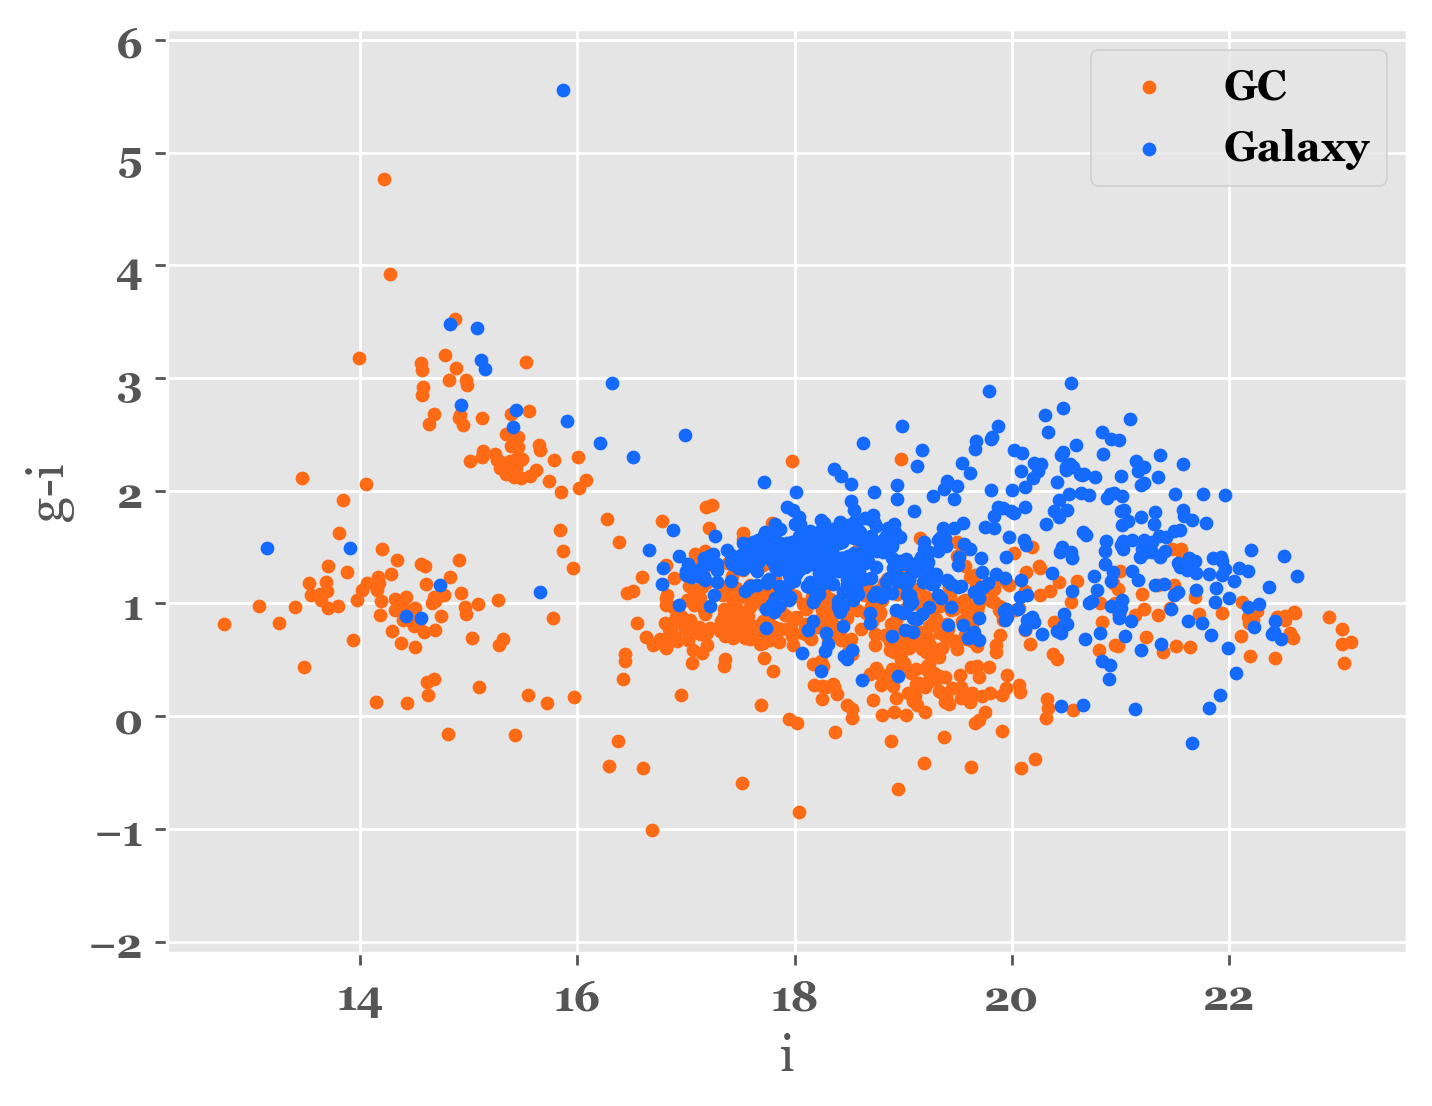

In [69]:
plt.figure(dpi=250)
#plt.title('Colour-magnitude ')
plt.rcParams.update({'font.size': 12})
#plt.figure(figsize=(7,8))
plt.scatter(gcs['i'],gcs['g-i'], s=15, c='#FF6A15',label='GC')
plt.scatter(galaxies['i'],galaxies['g-i'], s=15, c='#156AFF', label='Galaxy')
plt.ylabel('g-i')
plt.xlabel('i')
plt.legend()
plt.ylim([-2.1,6.1])

### 2MASS

In [59]:
training_data = pickle.load(open('./pickle/training_data/training_data_0203_jhk.pk','rb'))
training_data = training_data[training_data['2mass_acc']==True]

gcs = training_data[training_data['class'] == 'gc']

galaxies = training_data[training_data['class']=='galaxy']

In [37]:
test = 9
for t in enumerate(plt.style.available[test:],start=test):
    1
    #print(t)
style = plt.style.available[test]
plt.style.use(style)

font = {'family' : 'Georgia',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

Text(0.5, 1.0, 'g-J Colour-Magnitude')

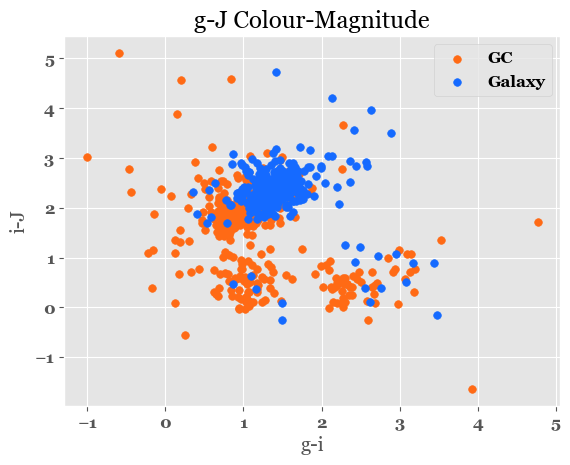

In [63]:
plt.figure(dpi=100)
#plt.title('Colour-magnitude ')
plt.rcParams.update({'font.size': 12})
#plt.figure(figsize=(7,8))
plt.scatter(gcs['g']-gcs['i'],gcs['i']-gcs['j'], s=30, c='#FF6A15',label='GC')
plt.scatter(galaxies['g']-galaxies['i'],galaxies['i']-galaxies['j'], s=30, c='#156AFF', label='Galaxy')
plt.ylabel('i-J')
plt.xlabel('g-i')
plt.legend()
plt.title('g-J Colour-Magnitude')
#plt.ylim([-2.1,6.1])

(-2.1, 6.1)

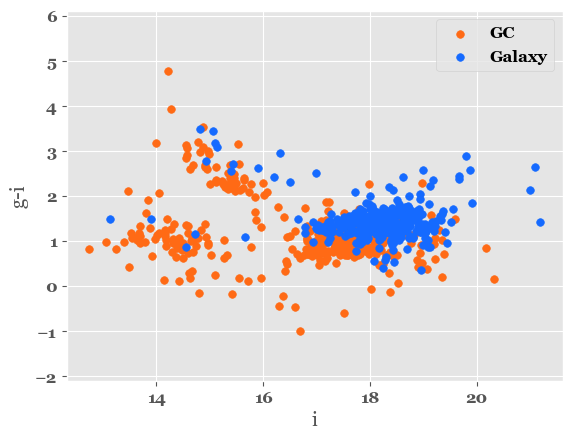

In [61]:
plt.figure(dpi=100)
#plt.title('Colour-magnitude ')
plt.rcParams.update({'font.size': 12})
#plt.figure(figsize=(7,8))
plt.scatter(gcs['i'],gcs['g-i'], s=30, c='#FF6A15',label='GC')
plt.scatter(galaxies['i'],galaxies['g-i'], s=30, c='#156AFF', label='Galaxy')
plt.ylabel('g-i')
plt.xlabel('i')
plt.legend()
plt.ylim([-2.1,6.1])

In [7]:
gcs = master_cat[master_cat['CLASS'] == 1]

In [8]:
gcs[gcs.ID=='Hodge-III']

,ID,RADEG,DECDEG,CLASS,DATATABLE
75,Hodge-III,8.313333,48.456417,1.0,veljanoski13_table2


In [42]:
# create a filter for objects in CAT which are closer than delta to their corresponding master_cat object
filter1 = gcs[gcs['DECDEG']<50]['DECDEG'] > 47.5 # what value of delta???????? how much RA/Dec dist is allowed

# apply the filter
test_ = gcs[gcs['DECDEG']<50][filter1]

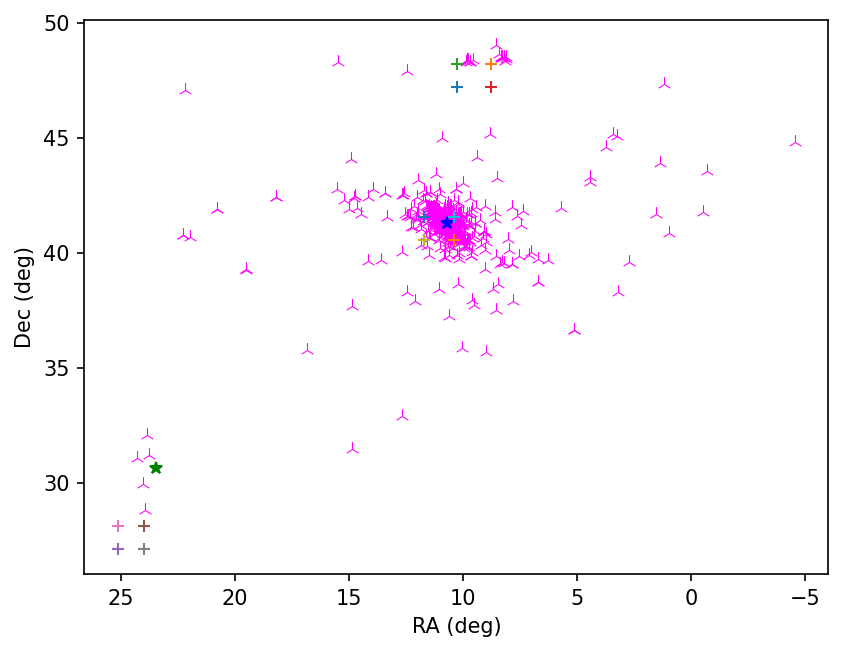

In [49]:
plt.figure(dpi=150)

ravals = []
for i in gcs['RADEG']:
    ravals += [(i+180)%360-180]

plt.scatter(ravals,gcs['DECDEG'],s=50,c='#fc00fc',marker='2',linewidths=0.5)
plt.plot(10.7,41.3,'b*')
plt.plot(23.46,30.65,'g*')

plt.plot(f382[0],f382[2],'+')
plt.plot(f382[1],f382[3],'+')
plt.plot(f382[0],f382[3],'+')
plt.plot(f382[1],f382[2],'+')

plt.plot(bounds[1][0],bounds[1][2],'+')
plt.plot(bounds[1][1],bounds[1][3],'+')
plt.plot(bounds[1][0],bounds[1][3],'+')
plt.plot(bounds[1][1],bounds[1][2],'+')

plt.plot(bounds[248][0],bounds[248][2],'+')
plt.plot(bounds[248][1],bounds[248][3],'+')
plt.plot(bounds[248][0],bounds[248][3],'+')
plt.plot(bounds[248][1],bounds[248][2],'+')

plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
#plt.ylim([28,55])
#plt.xlim([-6,26])
plt.gca().invert_xaxis()
plt.savefig('gc_positions.png', transparent=True)

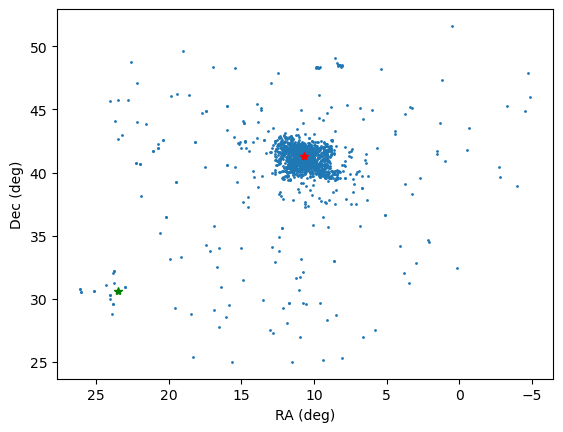

In [16]:
ravals = []
for i in master_cat['RADEG']:
    ravals += [(i+180)%360-180]

plt.scatter(ravals,master_cat['DECDEG'],s=1)
plt.plot(10.7,41.3,'r*')
plt.plot(23.46,30.65,'g*')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
#plt.ylim([28,55])
#plt.xlim([-6,26])
plt.gca().invert_xaxis()